<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/C%C3%B3pia_de_%5BAWARI_DS_08_03%5D_Pr%C3%A1tica_An%C3%A1lise_de_Pre%C3%A7os_de_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

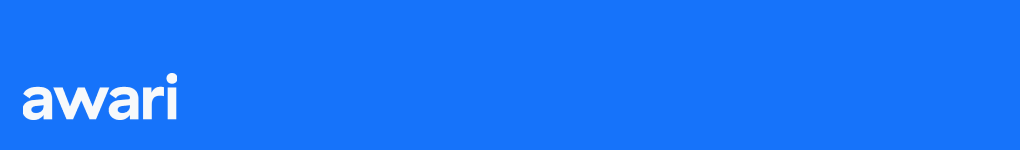

Prática da **Aula 08: Estatística Descritiva I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Análise de Preços de Carros**

## **Objetivo**

Esta é uma prática complementar, que poderá ser vista na 8ª aula do curso de Data Science, caso haja tempo.

Ela é similar a outra prática baseada em dados do Spotify. Será usada uma base de dados de preços de carros, baseados na Tabela Fipe, para a demonstração.

Os dados são de 2017, mas não comprometem a análise. O objetivo, aqui, não é fazer uma análise de dados atuais, mas, sim, demonstrar técnicas estatísticas aplicáveis a quaisquer conjuntos de dados.

## **Prática**

### **Preparativos**

In [ ]:
import numpy
import pandas
import seaborn

from matplotlib import pyplot
%matplotlib inline

from scipy import stats

### **Carregando os dados**

Primeiro, faça download do arquivo [fipe_price_list_201710.csv](https://drive.google.com/file/d/1LFe4C4aNTL8LEM6FovkrhTgBtXwVoNff/view?usp=share_link) e, em seguida, faça upload do mesmo para a pasta raiz do seu Google Drive.

Depois, monte o drive para poder importar o arquivo, conforme as etapas a seguir:

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


A seguir, carregamos os dados da tabela de preços e separamos modelos e versões de modelos dos carros:

In [ ]:
prices = pandas.read_csv('/content/drive/MyDrive/fipe_price_list_201710.csv', index_col=[0])

# Major maker
major_makers = ['Mercedes-Benz', 'BMW', 'Audi', 'VW - Volkswagen', 'Fiat',
                'GM - Chevrolet', 'Kia Motors', 'Hyundai', 'Ford', 'Citroën',
                'Renault']
prices['maker_name_major'] = prices['maker_name'].map(lambda x: x
                                                      if x in major_makers else
                                                      '_outros_')

# Model and version
model_version = prices.model_name.str.split(' ', 1)
prices['model_name'] = model_version.str[0]
prices['model_version'] = model_version.str[1]

<ipython-input-16-adf9f9eadc9b>:12: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  model_version = prices.model_name.str.split(' ', 1)


In [ ]:
prices.head()

,date,maker_name,model_name,fuel_type,build_year,price,fipe_code,maker_name_major,model_version
0,2017-10-15,Acura,Integra,1,1992,12614.0,038003-2,_outros_,GS 1.8
1,2017-10-15,Acura,Integra,1,1991,11601.0,038003-2,_outros_,GS 1.8
2,2017-10-15,Acura,Legend,1,1998,28761.0,038002-4,_outros_,3.2/3.5
3,2017-10-15,Acura,Legend,1,1997,24217.0,038002-4,_outros_,3.2/3.5
4,2017-10-15,Acura,Legend,1,1996,23302.0,038002-4,_outros_,3.2/3.5


In [ ]:
prices.describe()

,fuel_type,build_year,price
count,22934.000000,22934.000000,2.293400e+04
mean,1.336444,3442.571379,7.574337e+04
std,0.735149,6406.947379,2.016749e+05
min,1.000000,1985.000000,1.902000e+03
25%,1.000000,1999.000000,1.590050e+04
50%,1.000000,2007.000000,3.120300e+04
75%,1.000000,2013.000000,6.511175e+04
max,3.000000,32000.000000,5.500000e+06


### **Modelos por marca**

In [ ]:
prices_by_models = prices.groupby(['maker_name','model_name'])\
    ['price'].agg(['min', 'mean', 'max', 'std'])
prices_by_models.reset_index(level=1, inplace=True)
prices_by_models.head()

,model_name,min,mean,max,std
maker_name,,,,,
AM Gen,Hummer,170643.0,2.219286e+05,290263.0,34972.729108
ASTON MARTIN,DB9,554915.0,1.009014e+06,1436232.0,441272.962986
ASTON MARTIN,Rapide,643655.0,1.210589e+06,1840884.0,500723.204692
ASTON MARTIN,Vanquish,1542242.0,2.086130e+06,2688743.0,575502.046016
ASTON MARTIN,Vantage,316137.0,7.688905e+05,1712739.0,425884.471066


In [ ]:
models_by_maker = prices_by_models.pivot_table(index=['maker_name'],
                                               values='model_name',
                                               aggfunc='count')
models_by_maker.sort_values(by='model_name', ascending=False, inplace=True)
models_by_maker.head()

,model_name
maker_name,
Mercedes-Benz,121
BMW,100
GM - Chevrolet,58
Ford,38
Fiat,35


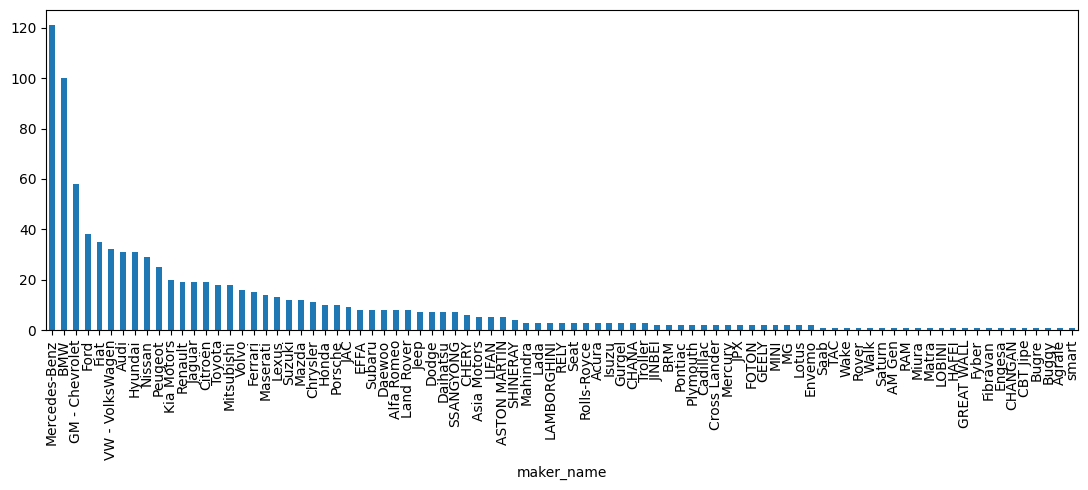

In [ ]:
ax = models_by_maker.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

The data has shown that the top five cars are Mercedes_Benz,

BMW, GM-Chevrolet, and Ford.

In [ ]:
prices_by_models = prices.groupby(['maker_name', 'model_name', 'build_year'])\
    ['price'].agg(['min', 'mean', 'max', 'std'])
prices_by_models.reset_index(level=[2, 1], inplace=True)
prices_by_models.head()

,model_name,build_year,min,mean,max,std
maker_name,,,,,,
AM Gen,Hummer,1998,170643.0,1.926247e+05,209401.0,19896.413303
AM Gen,Hummer,1999,199707.0,2.143920e+05,234803.0,18235.202521
AM Gen,Hummer,2000,239710.0,2.587690e+05,290263.0,27474.958981
ASTON MARTIN,DB9,2011,554915.0,5.549150e+05,554915.0,NaN
ASTON MARTIN,DB9,2014,1035894.0,1.035894e+06,1035894.0,NaN


In [ ]:
models_by_maker = prices_by_models.pivot_table(index=['maker_name'],
                                               values='model_name',
                                               columns=['build_year'],
                                               aggfunc='count')
models_by_maker.head()

build_year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,32000
maker_name,,,,,,,,,,,,,,,,,,,,,
AM Gen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTON MARTIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.0,NaN,4.0,1.0,4.0,NaN,NaN,3.0
Acura,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agrale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
Alfa Romeo,1.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


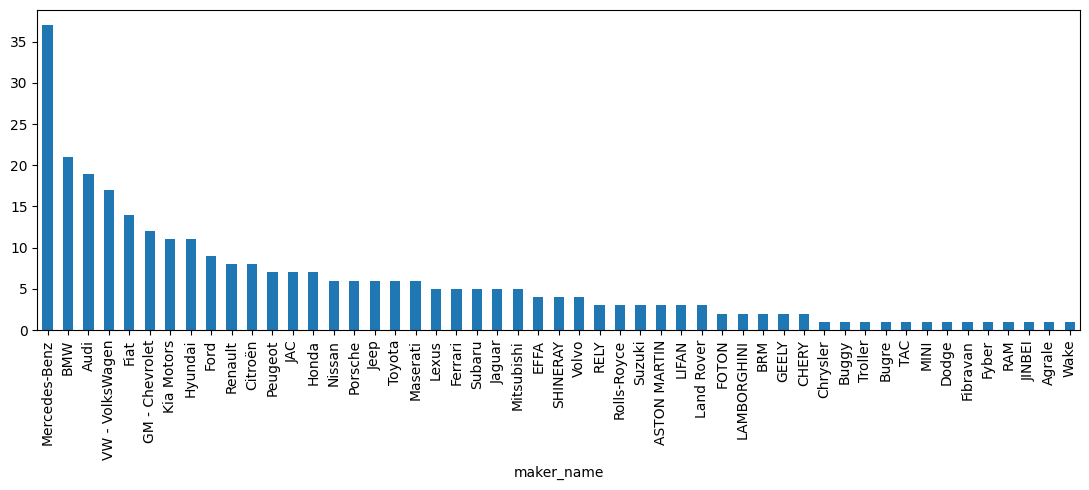

In [ ]:
models_by_maker_today = models_by_maker[32000].sort_values(ascending=False)
ax = models_by_maker_today[models_by_maker_today>0].plot.bar(legend=False,
                                                             figsize=[11, 5])
ax.figure.tight_layout()

In [ ]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
prices_by_models_major = prices.groupby(['maker_name_major', 'model_name',
                                         'build_year'])['price'].agg(['min', 'mean',
                                                                      'max', 'std'])
prices_by_models_major.reset_index(level=2, inplace=True)
prices_by_models_major.head()

build_year      min          mean      max  \
maker_name_major model_name                                               
Audi             100               1993  11553.0  11553.000000  11553.0   
                 100               1994  12118.0  14047.666667  16692.0   
                 100               1995  14134.0  16509.666667  18801.0   
                 80                1994  11082.0  17395.833333  33813.0   
                 80                1995  13895.0  19689.000000  38381.0   

                                     std  
maker_name_major model_name               
Audi             100                 NaN  
                 100         2369.267890  
                 100         2334.642656  
                 80          8336.167883  
                 80          9359.300893

In [ ]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
models_by_maker_major = prices_by_models_major\
    [prices_by_models_major.build_year < 32000].pivot_table(
        index='build_year', columns=['maker_name_major'],  values='mean',
        aggfunc='count')
models_by_maker_major.head()

maker_name_major,Audi,BMW,Citroën,Fiat,Ford,GM - Chevrolet,Hyundai,Kia Motors,Mercedes-Benz,Renault,_outros_
build_year,,,,,,,,,,,
1985,NaN,NaN,NaN,6.0,8.0,13.0,NaN,NaN,2.0,NaN,17.0
1986,NaN,2.0,NaN,6.0,9.0,13.0,NaN,NaN,5.0,NaN,17.0
1987,NaN,3.0,NaN,5.0,6.0,13.0,NaN,NaN,4.0,NaN,15.0
1988,NaN,2.0,NaN,5.0,6.0,14.0,NaN,NaN,5.0,NaN,17.0
1989,NaN,3.0,NaN,4.0,6.0,16.0,NaN,NaN,4.0,NaN,16.0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The label '_outros_' of <matplotlib.collections.PolyCollection object at 0x79d2208477c0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


<Axes: xlabel='build_year'>

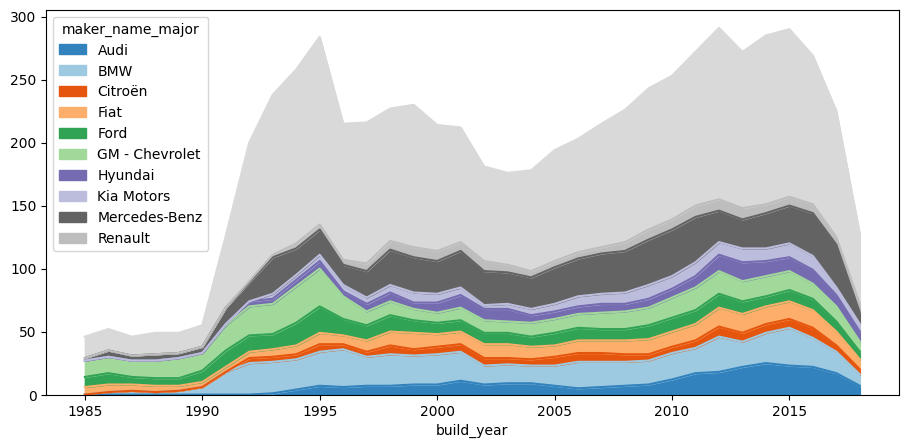

In [ ]:
colors = pyplot.cm.tab20c(numpy.linspace(0, 1, 11))
models_by_maker_major.plot.area(figsize=[11, 5], color=colors)

### **Versões por marca**

Estamos analisando desde 1985:

In [ ]:
ptable_versions = prices.pivot_table(index=['maker_name'], values='model_name',
                                     aggfunc=len)
ptable_versions.sort_values(by='model_name', ascending=False, inplace=True)

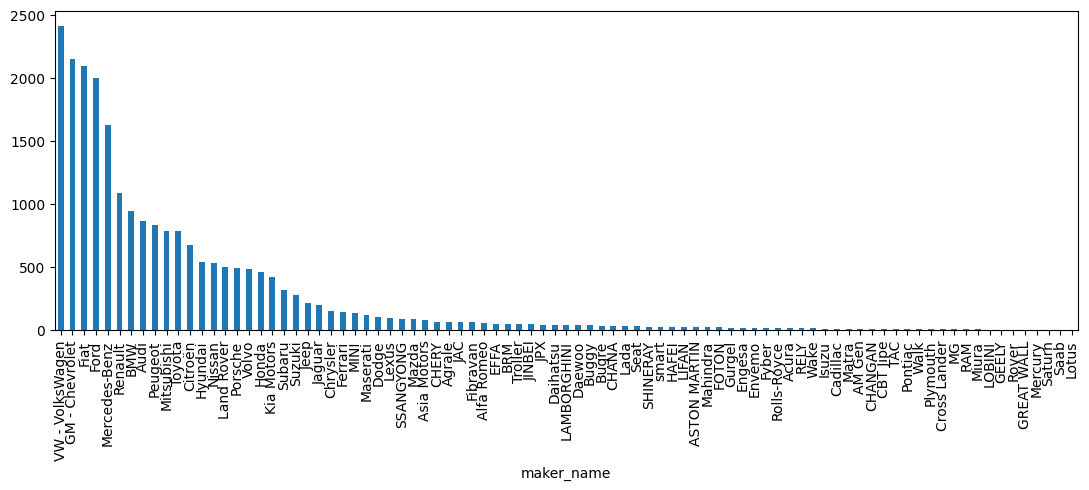

In [ ]:
ax = ptable_versions.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

Considerando-se apenas carros novos (0 km):

In [ ]:
ptable_versions_new = prices[prices.build_year==32000].pivot_table(
    index=['maker_name'], values='model_name', aggfunc=len)
ptable_versions_new.sort_values(by='model_name', ascending=False, inplace=True)

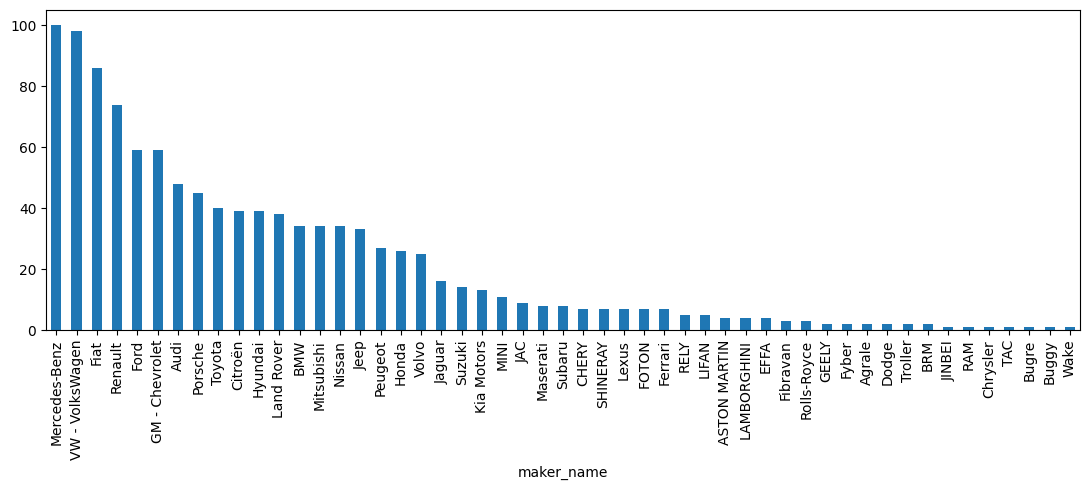

In [ ]:
ax = ptable_versions_new.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

Ao longo do tempo, quantas versões de carros há no mercado?

In [ ]:
ptable_model_version = prices.pivot_table(index=['maker_name', 'model_name'],
                                          columns='build_year',
                                          values='model_version', aggfunc=len)

In [ ]:
ptable_model_version.head()

build_year               1985   1986   1987   1988   1989   1990   1991   \
maker_name   model_name                                                    
AM Gen       Hummer        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ASTON MARTIN DB9           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Rapide        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Vanquish      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Vantage       NaN    NaN    NaN    NaN    NaN    NaN    NaN   

build_year               1992   1993   1994   ...  2010   2011   2012   2013   \
maker_name   model_name                       ...                               
AM Gen       Hummer        NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
ASTON MARTIN DB9           NaN    NaN    NaN  ...    NaN    1.0    NaN    NaN   
             Rapide        NaN    NaN    NaN  ...    NaN    1.0    1.0    NaN   
             Vanquish      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
             Vantage       NaN    NaN    NaN  ...    NaN    2.0    3.0    NaN   

build_year               2014   2015   2016   2017   2018   32000  
maker_name   model_name                                            
AM Gen       Hummer        NaN    NaN    NaN    NaN    NaN    NaN  
ASTON MARTIN DB9           1.0    NaN    1.0    NaN    NaN    NaN  
             Rapide        1.0    NaN    1.0    NaN    NaN    1.0  
             Vanquish      1.0    NaN    1.0    NaN    NaN    1.0  
             Vantage       1.0    1.0    2.0    NaN    NaN    2.0  

[5 rows x 35 columns]

<Axes: xlabel='build_year'>

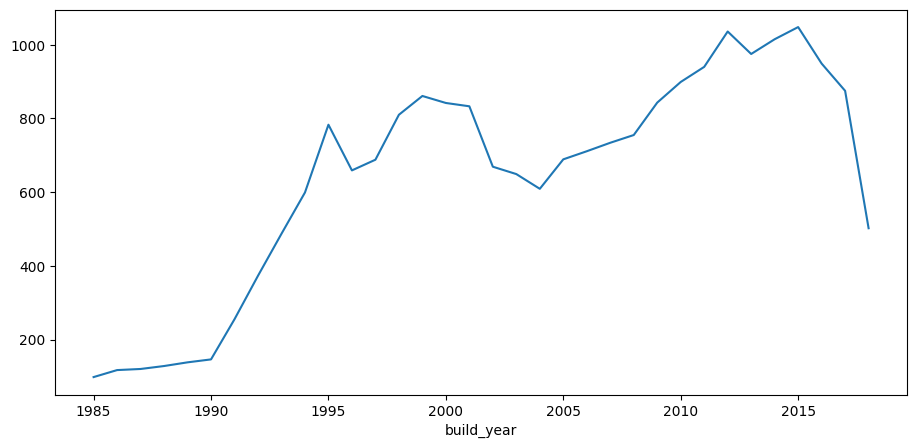

In [ ]:
version_timeseries = ptable_model_version.sum()
version_timeseries[version_timeseries.index < 32000].plot.line(figsize=[11, 5])

### **Distribuição de preços**

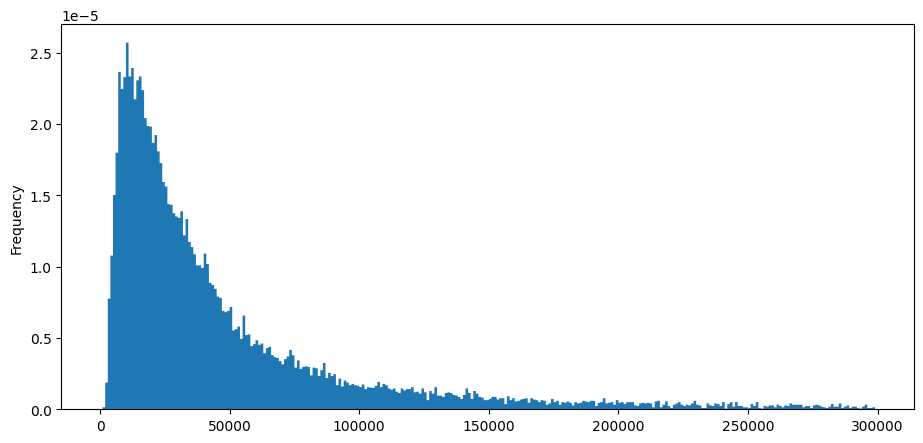

In [ ]:
bins = numpy.arange(0, 300e3, 1e3)
ax = prices['price'].plot.hist(bins=bins, legend=False, figsize=[11, 5],
                               linewidth=0, density=True, histtype='stepfilled')

#### **Distribuição gaussiana intertida**

Aplicando [Inverse gaussian distribution](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution):

\begin{equation}
    f(x\;|\;\mu, \lambda) = \sqrt{\frac{\lambda}{2\pi x^3}} e^{-\frac{\lambda(x - \mu)^2}{2 \mu^2 x}}
\end{equation}

Text(30, 10, '9187')

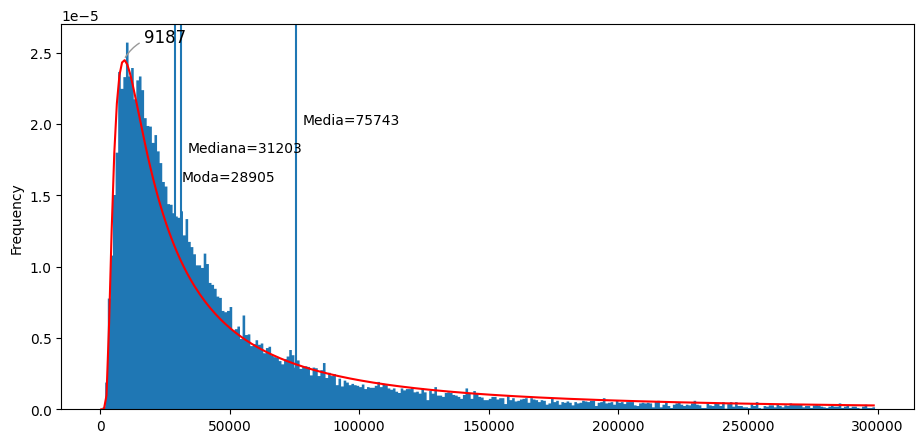

In [ ]:
ax = prices['price'].plot.hist(bins=bins, legend=False, figsize=[11, 5],
                               linewidth=0, density=True, histtype='stepfilled')

mean, median = prices.price.mean(), prices.price.median()
mode = prices.price.mode().values[0]
ax.axvline(mean)
ax.text(mean+2500, 2e-5, 'Media={:.0f}'.format(mean))
ax.axvline(median)
ax.text(median+2500, 1.8e-5, 'Mediana={:.0f}'.format(median))
ax.axvline(mode)
ax.text(mode+2500, 1.6e-5, 'Moda={:.0f}'.format(mode))

mu, loc, scale = stats.invgauss.fit(prices['price'])
x = 0.5 * (bins[1:] + bins[:-1])  # Center of the bins
pdf = stats.invgauss.pdf(x, mu, loc, scale)
ax.plot(x, pdf, 'r')
ax.annotate('{:.0f}'.format(scale/mu), xy=(scale/mu, 2.45e-5), xycoords='data',
                xytext=(30, 10), textcoords='offset points',
                fontsize='12', fontstretch='ultra-condensed',
                ha='center', va='bottom',
                arrowprops=dict(arrowstyle="-",
                                connectionstyle='arc3,rad=0.3',
                                color='#999999')
           )

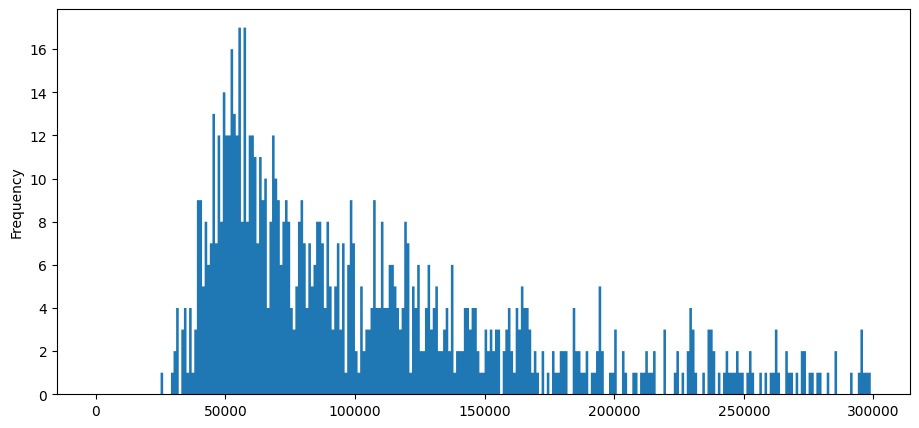

In [ ]:
ax = prices['price'][prices.build_year == 32000].plot.hist(
    bins=bins, legend=False, figsize=[11, 5], linewidth=0,
    histtype='stepfilled')

<Axes: xlabel='build_year', ylabel='price'>

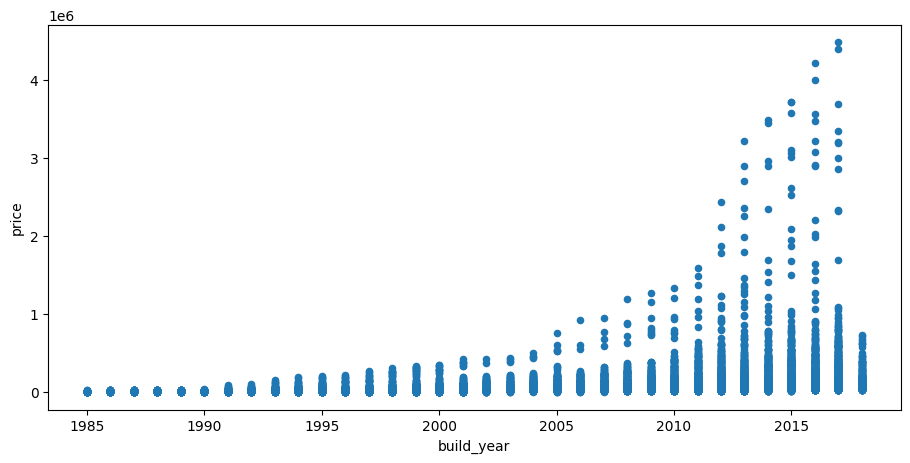

In [ ]:
prices.where(prices.build_year < 32000)\
    .plot.scatter('build_year', 'price', figsize=[11, 5])

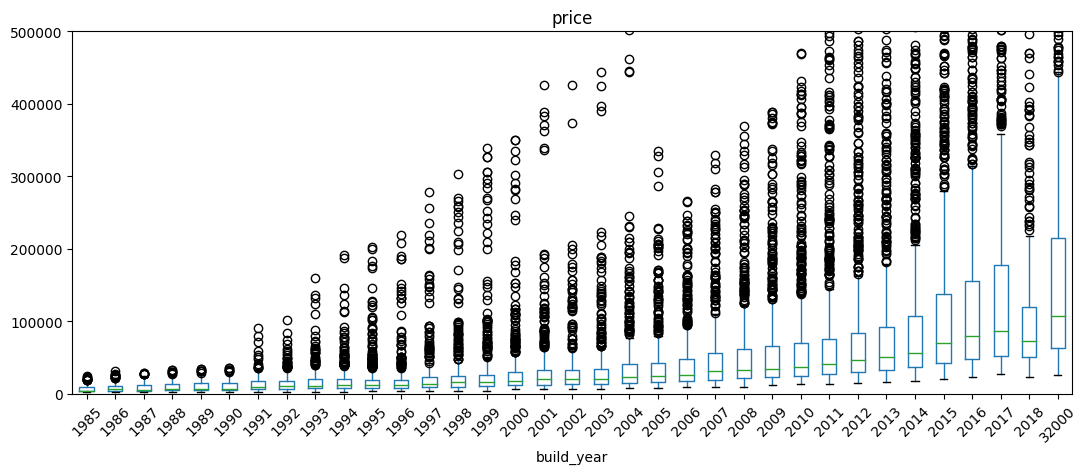

In [ ]:
ax = prices.boxplot(column='price', by='build_year', rot=45, figsize=[11, 5],
                    grid=False)
ax.set_ylim([0, 5e5])
ax.figure.suptitle('')
ax.figure.tight_layout()

In [ ]:
ptable = prices.pivot_table(values='price', index=['maker_name', 'model_name',
                                                   'fuel_type'],
                            columns=['build_year'])
ptable.describe()

build_year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,32000
count,50.000000,58.000000,52.000000,55.000000,57.000000,62.000000,134.000000,210.000000,252.000000,275.000000,...,2.710000e+02,2.880000e+02,3.050000e+02,2.880000e+02,2.980000e+02,3.070000e+02,2.880000e+02,2.460000e+02,137.000000,3.140000e+02
mean,7497.733667,9676.396839,10989.528663,12069.736061,12729.083500,13675.162750,16966.596899,17412.521735,20292.588336,21412.604360,...,1.103455e+05,1.278424e+05,1.420926e+05,1.718912e+05,2.021250e+05,2.537787e+05,2.951061e+05,2.934637e+05,134400.539443,3.625156e+05
std,5896.329065,7216.644593,7904.445955,8410.434603,8767.920232,8926.772187,13480.079525,14071.641928,18390.710642,20690.058114,...,1.600777e+05,2.035426e+05,2.693251e+05,3.569604e+05,3.922134e+05,5.022644e+05,5.559524e+05,5.297189e+05,116199.193452,6.845434e+05
min,1905.000000,1970.000000,2801.000000,3197.000000,3306.000000,3422.000000,2086.666667,2226.666667,2467.500000,3211.000000,...,1.349600e+04,1.401300e+04,1.504500e+04,1.618200e+04,1.784200e+04,2.204267e+04,2.543550e+04,2.760500e+04,26575.666667,2.938567e+04
25%,3460.000000,4145.400000,4546.083333,5044.750000,5238.833333,6216.833333,7682.250000,7904.250000,8519.000000,8790.000000,...,2.817871e+04,3.035510e+04,3.288100e+04,3.745193e+04,4.382831e+04,5.582062e+04,6.157688e+04,6.998806e+04,54559.142857,7.402405e+04
50%,4357.000000,7887.100000,9178.000000,9966.500000,11457.000000,11992.000000,13141.250000,13406.000000,14794.500000,14625.500000,...,5.383000e+04,5.670242e+04,6.280467e+04,7.292450e+04,8.414225e+04,1.106752e+05,1.270136e+05,1.379740e+05,92715.500000,1.477769e+05
75%,9221.125000,13045.000000,14877.250000,17493.500000,16595.000000,18687.000000,22292.500000,21736.375000,25114.000000,25888.000000,...,1.252220e+05,1.342025e+05,1.367405e+05,1.513331e+05,1.975008e+05,2.335923e+05,2.801575e+05,3.051585e+05,163561.000000,3.412118e+05
max,22521.000000,31320.000000,28940.000000,30620.000000,31686.000000,33134.000000,81070.000000,92733.000000,142937.000000,174662.666667,...,1.331256e+06,1.588451e+06,2.432665e+06,2.958192e+06,3.442318e+06,3.714500e+06,3.990949e+06,4.034623e+06,625671.333333,4.892973e+06


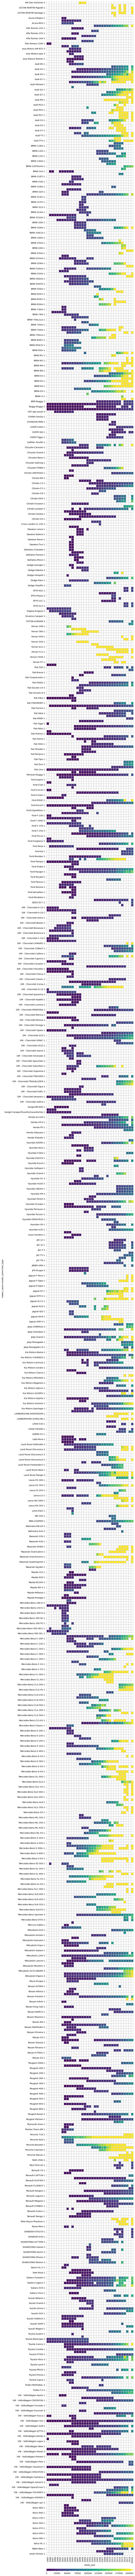

In [ ]:
fig = pyplot.figure(figsize=[9, 200])
ax = seaborn.heatmap(ptable, square=False, cmap='viridis', linewidths=0.1,
                     linecolor='#cccccc', vmin=0, vmax=200e3,
                     cbar_kws=dict(orientation='horizontal', extend='max',
                                   pad=0.0045, aspect=40))
fig.tight_layout()

### **Desvalorização ao deixar a concessionária**

KeyError: ignored

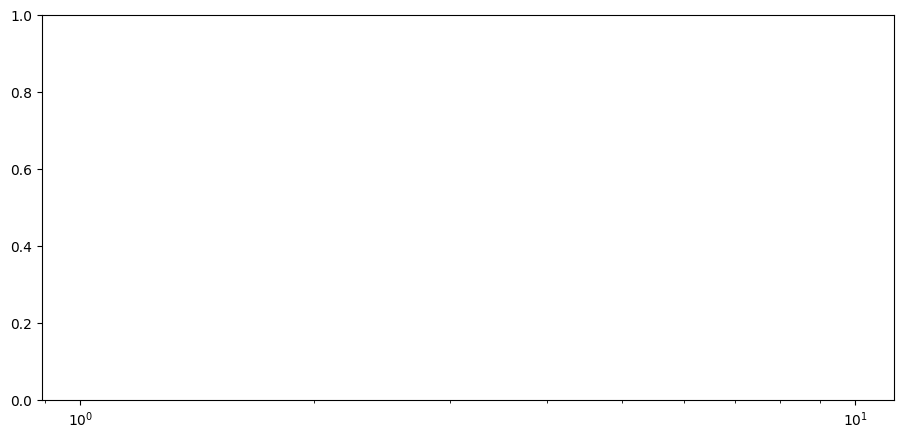

In [ ]:
def get_almost_new(df):
    if not pandas.isnull(df[2018]):
        return df[2018]
    elif not pandas.isnull(df[2017]):
        return df[2017]
    elif not pandas.isnull(df[2016]):
        return df[2016]
    else:
        return numpy.nan


prices_ptable = prices.where(prices.build_year >= 2016)\
    .pivot_table(values='price', columns=['build_year'],
                 index=['maker_name', 'model_name', 'fipe_code'], aggfunc=sum)
prices_ptable['almostnew'] = [get_almost_new(prices_ptable.iloc[n]) for n
                                  in range(len(prices_ptable))]
prices_ptable['rel_devaluation'] = 1 - (prices_ptable['almostnew'] /
                                    prices_ptable[32000])

ax = prices_ptable.plot.scatter([200000], 'rel_devaluation', logx=True,
                                figsize=[11, 5], by='maker_name')
ax.set_xlabel('')
ax.figure.tight_layout()

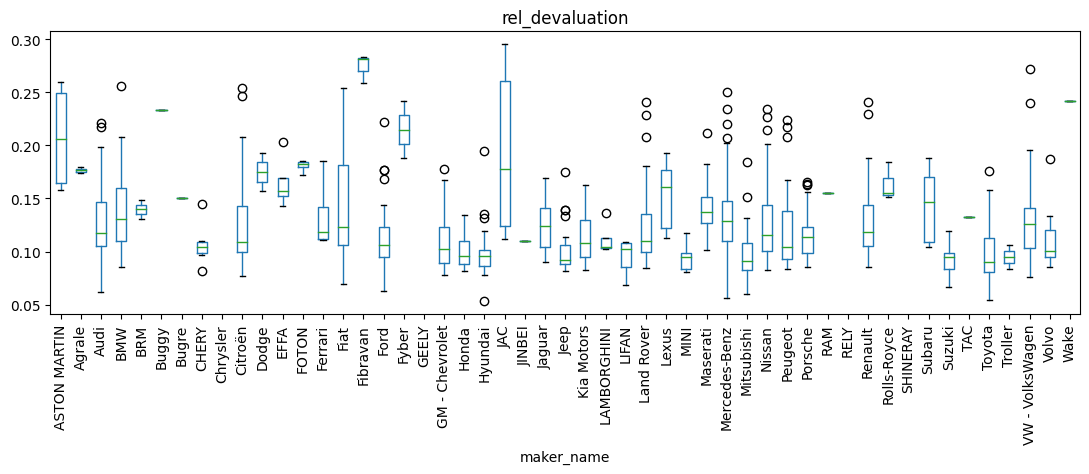

In [ ]:
ax = prices_ptable.boxplot(column='rel_devaluation', by='maker_name', rot=90,
                           grid=False, figsize=[11, 5])
ax.figure.suptitle('')
ax.figure.tight_layout()

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**